In [3]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x = torch.linspace(0,799,800)

In [6]:
y = torch.sin(x*2*3.1416/40)

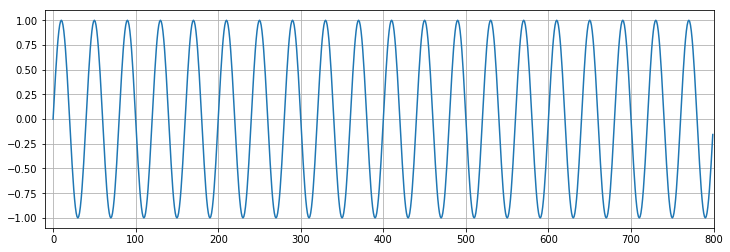

In [8]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy());

In [9]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

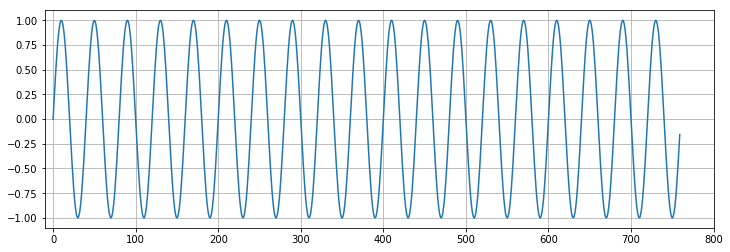

In [48]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(train_set.numpy());

In [49]:
def input_data(seq,ws):
    
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    
    return out

In [50]:
window_size = 40

train_data = input_data(train_set,window_size)

In [51]:
len(train_data)

720

In [52]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [53]:
train_data[1]

(tensor([ 1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,  7.0711e-01,
          8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,  1.0000e+00,
          9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,  7.0710e-01,
          5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01, -7.2400e-06,
         -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01, -7.0711e-01,
         -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01, -1.0000e+00,
         -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01, -7.0710e-01,
         -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01,  1.4480e-05]),
 tensor([0.1564]))

In [54]:
class LSTMmodel(nn.Module):
    
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size,hidden_size)

        self.linear = nn.Linear(hidden_size,out_size)

        self.hidden = (torch.zeros(1,1,hidden_size),
                       torch.zeros(1,1,hidden_size))
    
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]
        

In [55]:
model = LSTMmodel()

In [56]:
model

LSTMmodel(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [57]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [58]:
for p in model.parameters():
    print(p.numel())

200
10000
200
200
50
1


Epoch:  1 Loss: 0.08228099
Loss on test predictions: 0.5825868844985962


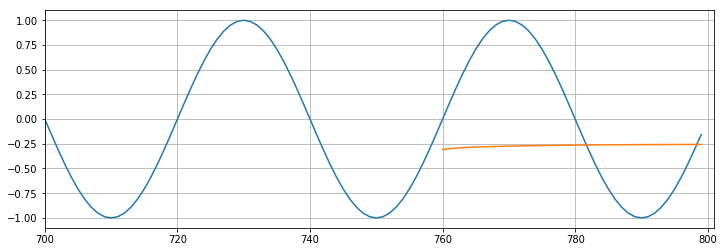

Epoch:  2 Loss: 0.04604303
Loss on test predictions: 0.5202121138572693


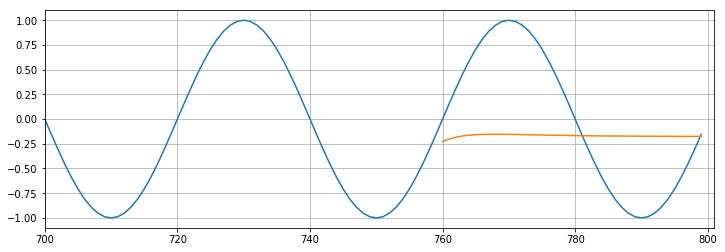

Epoch:  3 Loss: 0.01105920
Loss on test predictions: 0.34703823924064636


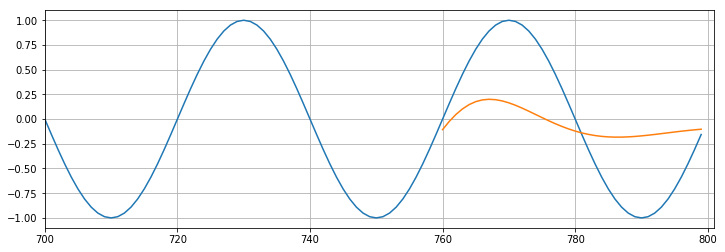

Epoch:  4 Loss: 0.00037674
Loss on test predictions: 0.03875954449176788


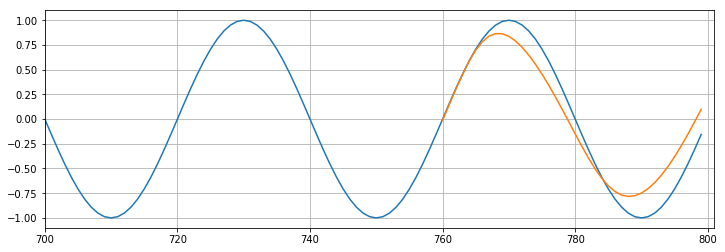

Epoch:  5 Loss: 0.00005612
Loss on test predictions: 0.0046420227736234665


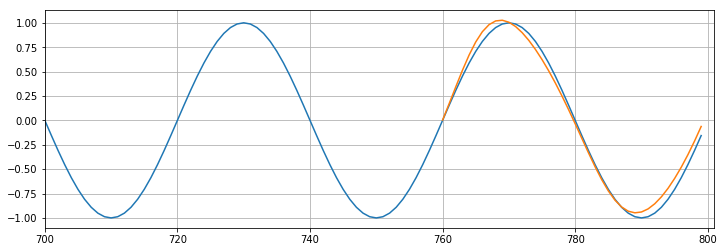

Epoch:  6 Loss: 0.00006237
Loss on test predictions: 0.003396125975996256


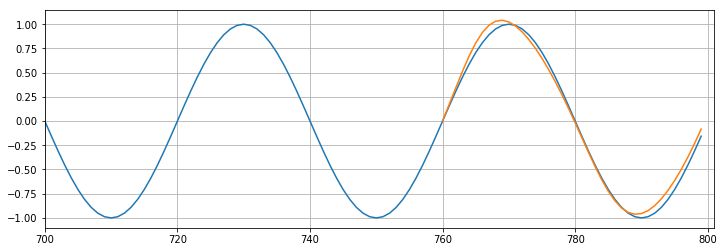

Epoch:  7 Loss: 0.00007615
Loss on test predictions: 0.003033382585272193


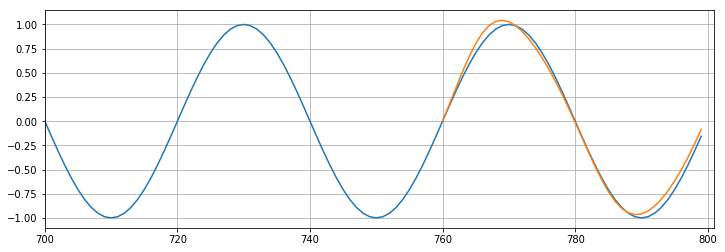

Epoch:  8 Loss: 0.00008594
Loss on test predictions: 0.0027707803528755903


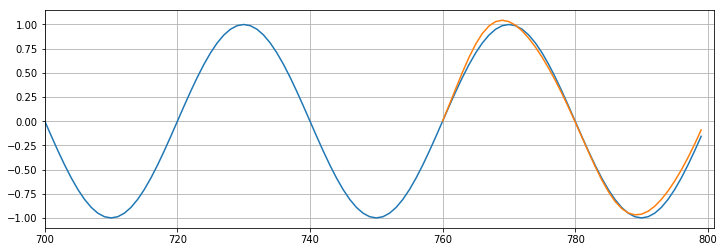

Epoch:  9 Loss: 0.00009167
Loss on test predictions: 0.002557396423071623


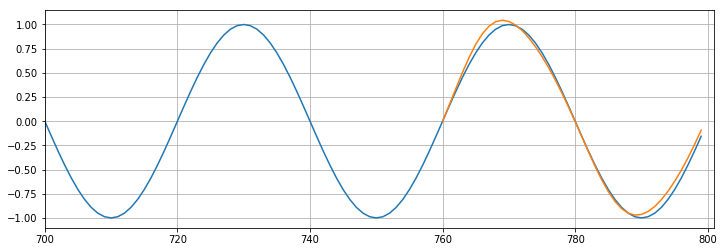

Epoch: 10 Loss: 0.00009422
Loss on test predictions: 0.002379982266575098


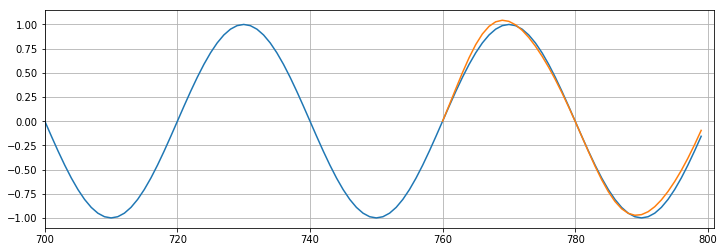

Epoch: 11 Loss: 0.00009444
Loss on test predictions: 0.0022303343284875154


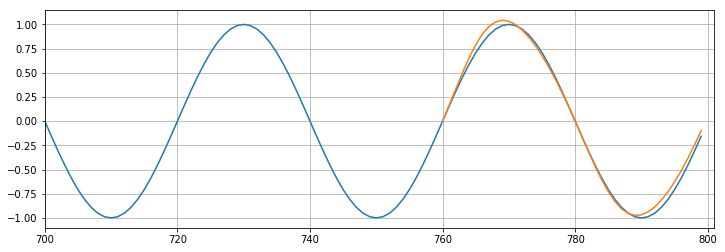

Epoch: 12 Loss: 0.00009304
Loss on test predictions: 0.0021026665344834328


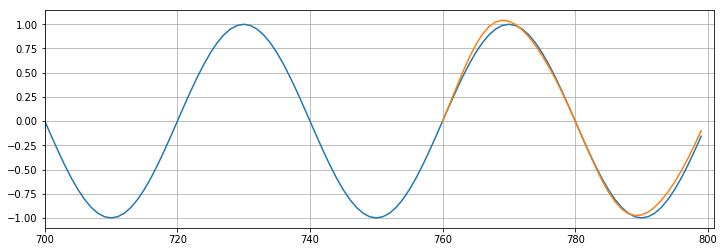

Epoch: 13 Loss: 0.00009057
Loss on test predictions: 0.0019924233201891184


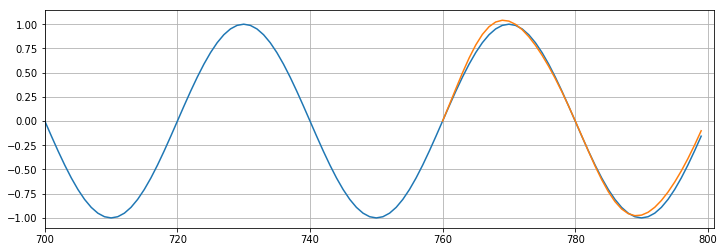

Epoch: 14 Loss: 0.00008743
Loss on test predictions: 0.0018966329516842961


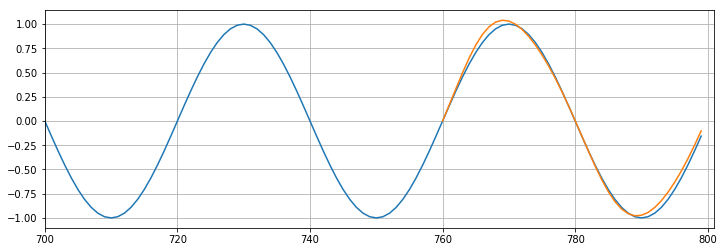

Epoch: 15 Loss: 0.00008391
Loss on test predictions: 0.0018125176429748535


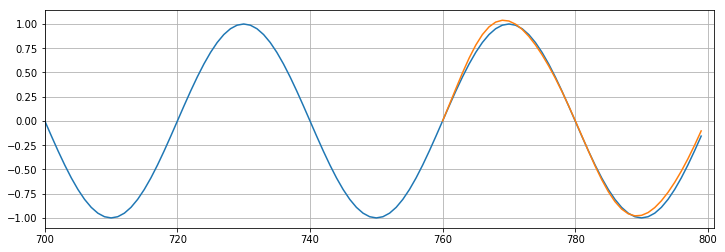

In [59]:
epochs = 15
future = 40

for i in range(epochs):
    
    # tuple-unpack the train_data set
    for seq, y_train in train_data:
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
    # MAKE PREDICTIONS
    # start with a list of the last 10 training records
    preds = train_set[-window_size:].tolist()

    for f in range(future):  
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                            torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
    print(f'Loss on test predictions: {loss}')

    # Plot from point 700 to the end
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800),preds[window_size:])
    plt.show()

In [60]:
epochs = 20
window_size = 40
future = 40

all_data = input_data(y,window_size)

In [61]:
import time
start_time = time.time()

for i in range(epochs):
    
    # tuple-unpack the train_data set
    for seq, y_train in all_data:
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
total_time = time.time() - start_time
print(total_time/60)

Epoch:  1 Loss: 0.00008001
Epoch:  2 Loss: 0.00007609
Epoch:  3 Loss: 0.00007225
Epoch:  4 Loss: 0.00006856
Epoch:  5 Loss: 0.00006505
Epoch:  6 Loss: 0.00006174
Epoch:  7 Loss: 0.00005864
Epoch:  8 Loss: 0.00005574
Epoch:  9 Loss: 0.00005305
Epoch: 10 Loss: 0.00005055
Epoch: 11 Loss: 0.00004822
Epoch: 12 Loss: 0.00004606
Epoch: 13 Loss: 0.00004406
Epoch: 14 Loss: 0.00004220
Epoch: 15 Loss: 0.00004047
Epoch: 16 Loss: 0.00003886
Epoch: 17 Loss: 0.00003736
Epoch: 18 Loss: 0.00003596
Epoch: 19 Loss: 0.00003466
Epoch: 20 Loss: 0.00003344
4.879358851909638


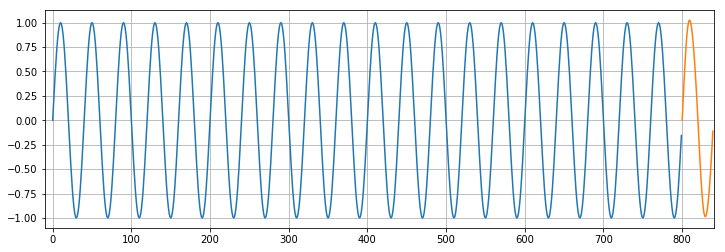

In [64]:
preds = y[-window_size:].tolist()

for i in range(future):  
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        # Reset the hidden parameters
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))  
        preds.append(model(seq).item())

plt.figure(figsize=(12,4))
plt.xlim(-10,841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,800+future),preds[window_size:])
plt.show()